In [5]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import json
import glob as glob
import os
%matplotlib inline
import warnings
from matplotlib.ticker import FormatStrFormatter
warnings.filterwarnings('ignore')

In [9]:
def to_seconds(timestamp):
    try: 
        ts = timestamp.split(':')
        return float(float(ts[0])*60*60 + float(ts[1])*60 + float(ts[2]))
    except: return float(0)

,job,nfiles,sync,time,runtime
2,save,1000000,1,00:25:59,0.083230
3,save,1000000,5,00:25:59,0.032145
4,save,1000000,10,00:25:59,0.010521
5,save,1000000,15,00:25:59,0.002081
6,save,1000000,20,00:25:59,0.021751
7,save,1000000,25,00:25:59,0.029060
8,save,1000000,30,00:25:59,0.029596


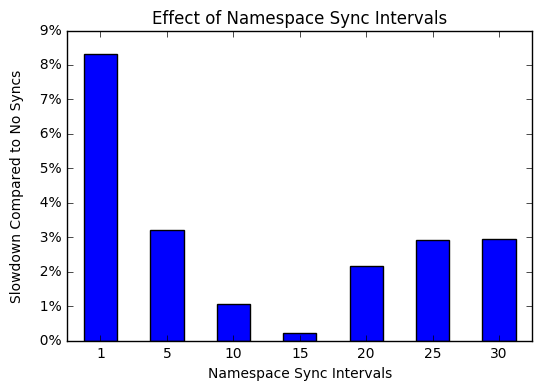

In [44]:
jobs   = ['RPCs', 'create', 'save', 'persist', 'v.apply', 'apply']
files  = ['10000', '100000']

with open('../results-cloudlab/summary.txt') as f:
    df = pd.read_csv(f, names=['job', 'nfiles', 'sync', 'time', 'runtime'])
    df['runtime'] = (1 - (106.564552/df['runtime'].apply(to_seconds)))
df = df[df['job'] == 'save']
df = df.drop(df.index[0])
fig, ax = plt.subplots(1, 1)
df.plot.bar(ax=ax, y='runtime')
ax.set_xticklabels(df['sync'], rotation=0)
ax.set_ylabel("Slowdown Compared to No Syncs")
ax.legend().remove()
ax.set_yticklabels(['{:3.0f}%'.format(x*100) for x in ax.get_yticks()])
ax.set_xlabel("Namespace Sync Intervals")
ax.set_title("Effect of Namespace Sync Intervals")
fig.savefig('graphs/slowdown-sync.png', bbox_inches='tight', dpi=400)
df